In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Analysis of Property Sales

You are provided with a real dataset gathered from public sources that includes date, price and basic property information from real estate transactions in Melbourne. There are many undefined and incorrect values in the dataset, but this is common in real data. Your task will be to clean and prepare the data, then conduct some basic analysis on the cleaned data using summary statistics and visualization. This notebook should include markdown cells to structure your work, explain your reasoning and interpret results as well as plots to communicate your findings. The questions focus on residential properties, however, the data may also contain commercial/industrial properties, car spaces etc.

### Description of Fields
* suburb - Suburb
* address - Address
* bedrooms - Number of bedrooms
* price - Price in Australian dollars
* method -
    * S - property sold;
    * SP - property sold prior;
    * PI - property passed in;
    * PN - sold prior not disclosed;
    * SN - sold not disclosed;
    * NB - no bid;
    * VB - vendor bid;
    * W - withdrawn prior to auction;
    * SA - sold after auction;
    * SS - sold after auction price not disclosed.
    * N/A - price or highest bid not available.
* type -
    * h - house, cottage, villa, semi, terrace;
    * u - unit, duplex;
    * t - townhouse;
    * dev site - development site;
    * o res - other residential.
* date - Date sold
* distance - Distance from CBD in kilometres
* region_name - Region
* bathrooms - Number of bathrooms
* car - Number of car spaces
* land_size - Land size in square metres
* building_area - Building size in square metres
* year_built - Year of primary construction
* council_area - Governing council for the area
* latitude
* longitude

Original dataset credit: [Tony Pino](https://www.kaggle.com/anthonypino).

## Tasks

1. Cleaning and Preparation
    * Remove all rows where the price is not known.
    * Remove all rows where the building area is not known or not realistic. Briefly justify an appropriate lower and upper bound.
    * Convert the date column to the pandas datetime type.
    * (Optional) Remove, with justification, any other rows you think appropriate in this context.
2. Analysis Questions
    * After cleaning, was more money spent on houses or units overall? How many of each were sold?
    * Plot the relationship between building area and price, is this what you would expect?
    * If you limit your analysis to only 2 bedroom properties, are units or houses more expensive? Plot and interpret the distribution of prices for each.
    * Split your data into separate dataframes for 2016, 2017 and 2018. Is the average price of a house going up or down in the period? Is the trend the same for units?
  

## 1. Read csv data into dataframe

In [2]:
fpath = 'C:/Users/P1331215/Documents/GitHub/portfolio-rishabhgargau/files/'

melb = pd.read_csv(os.path.join("files", fpath + "melbourne_data.csv"))
melb.head()

,suburb,address,bedrooms,type,price,method,date,distance,postcode,bathrooms,car,land_size,building_area,year_built,council_area,latitude,longtitude,region
0,Abbotsford,68 Studley St,2,h,NaN,SS,3/09/2016,2.5,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan
1,Abbotsford,85 Turner St,2,h,1480000.0,S,3/12/2016,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,4/02/2016,2.5,3067.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan


In [3]:
melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   suburb         34857 non-null  object 
 1   address        34857 non-null  object 
 2   bedrooms       34857 non-null  int64  
 3   type           34857 non-null  object 
 4   price          27247 non-null  float64
 5   method         34857 non-null  object 
 6   date           34857 non-null  object 
 7   distance       34856 non-null  float64
 8   postcode       34856 non-null  float64
 9   bathrooms      26631 non-null  float64
 10  car            26129 non-null  float64
 11  land_size      23047 non-null  float64
 12  building_area  13742 non-null  float64
 13  year_built     15551 non-null  float64
 14  council_area   34854 non-null  object 
 15  latitude       26881 non-null  float64
 16  longtitude     26881 non-null  float64
 17  region         34854 non-null  object 
dtypes: flo

In [4]:
melb.describe()

,bedrooms,price,distance,postcode,bathrooms,car,land_size,building_area,year_built,latitude,longtitude
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851
std,0.969933,6.414671e+05,6.788892,109.023903,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790
25%,2.000000,6.350000e+05,6.400000,3051.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500
50%,3.000000,8.700000e+05,10.300000,3103.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800
75%,4.000000,1.295000e+06,14.000000,3156.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900
max,16.000000,1.120000e+07,48.100000,3978.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350


## 2. Data Cleaning and Preparation
### 2.1 Remove records where price is missing

In [5]:
print("All records in 'melb' \t\t\t- ", melb.shape[0])
print("Records with missing price in 'melb' \t- ", melb[melb['price'].isnull()].shape[0])
df = melb.drop( melb.index[melb.index[melb['price'].isnull()]] )
print("Records with missing price in 'df' \t - ", df[df['price'].isnull()].shape[0])
df.head()

All records in 'melb' 			-  34857
Records with missing price in 'melb' 	-  7610
Records with missing price in 'df' 	 -  0


,suburb,address,bedrooms,type,price,method,date,distance,postcode,bathrooms,car,land_size,building_area,year_built,council_area,latitude,longtitude,region
1,Abbotsford,85 Turner St,2,h,1480000.0,S,3/12/2016,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
5,Abbotsford,40 Federation La,3,h,850000.0,PI,4/03/2017,2.5,3067.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan
6,Abbotsford,55a Park St,4,h,1600000.0,VB,4/06/2016,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan


### 2.2.1 Remove records where building_area is missing

In [6]:
print("Records with missing price or building_area in 'melb' \t- " \
      , melb[melb['price'].isnull() | melb['building_area'].isnull()].shape[0])

df = melb.drop( melb.index[melb.index[(melb['price'].isnull()) | (melb['building_area'].isnull())]] )

print("\nRecords in clean 'df' - ", df.shape[0])
df.head()

Records with missing price or building_area in 'melb' 	-  24201

Records in clean 'df' -  10656


,suburb,address,bedrooms,type,price,method,date,distance,postcode,bathrooms,car,land_size,building_area,year_built,council_area,latitude,longtitude,region
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
6,Abbotsford,55a Park St,4,h,1600000.0,VB,4/06/2016,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,7/05/2016,2.5,3067.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan
14,Abbotsford,98 Charles St,2,h,1636000.0,S,8/10/2016,2.5,3067.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan


### 2.2.2 Remove records where building_area is not realisitc
    1. Use value_counts function with bins and plot its graph to identify acceptable range of building_area
    2. Using above method, I shrinked my limit to the values where most of the reocrds belong
    3. The final result of the acceptable limit of building_area is 50 to 500 sq meters

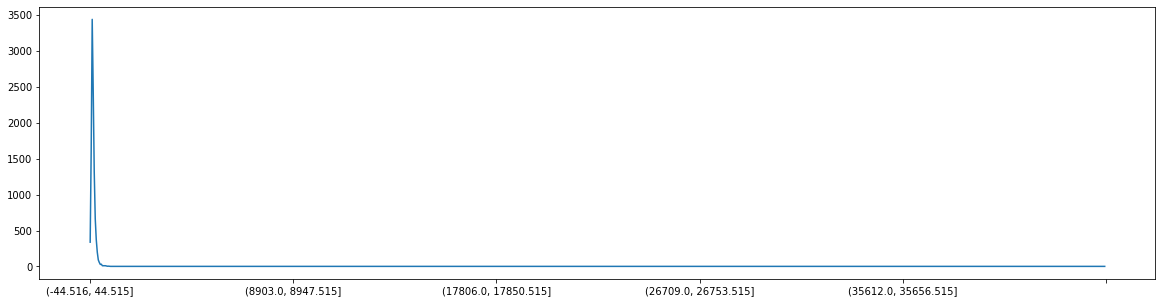

In [7]:
df.building_area.value_counts(bins=1000).sort_index().plot(figsize=(20,5))

#### A per above graph, any values above 5000 sq meters are too less and can be ignored as well

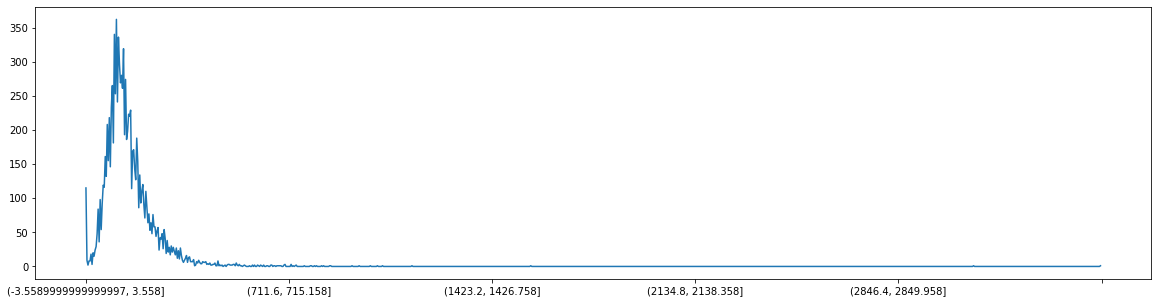

In [8]:
df[df['building_area']<5000].building_area.value_counts(bins=1000).sort_index().plot(figsize=(20,5))

#### A per above graph, any values above 1000 sq meters are too less and can be ignored as well

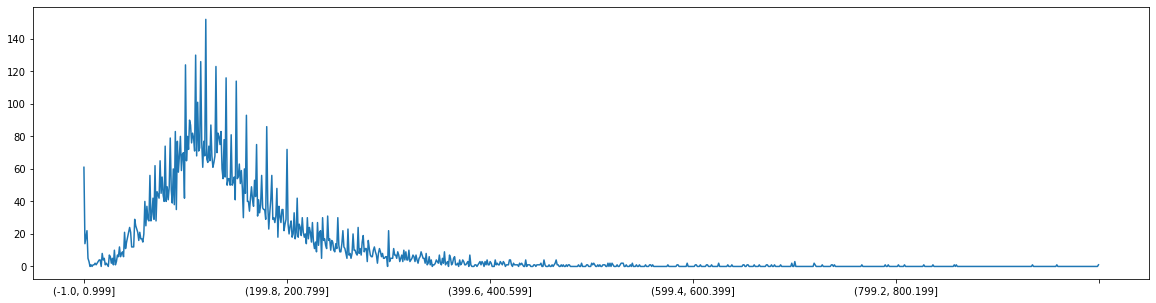

In [9]:
df[df['building_area']<1000].building_area.value_counts(bins=1000).sort_index().plot(figsize=(20,5))

#### A per above graph, any values above 500 sq meters are too less and can be ignored as well

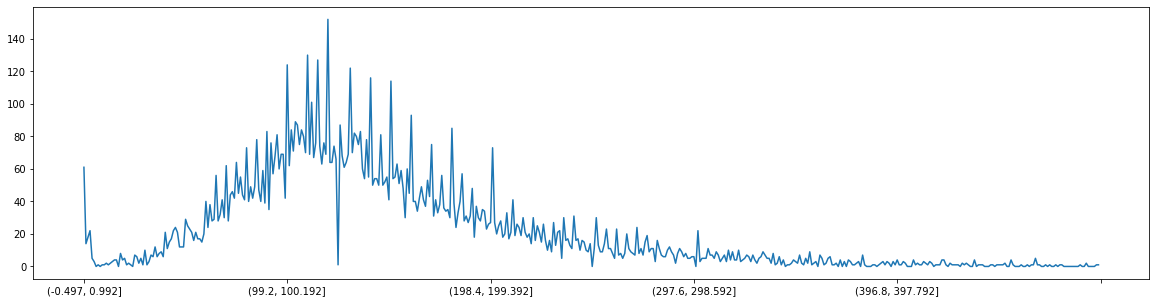

In [10]:
df[df['building_area']<500].building_area.value_counts(bins=500).sort_index().plot(figsize=(20,5))

#### A per above graph, there are lot of values below 100 sq meters, lets zoom into them to double check 

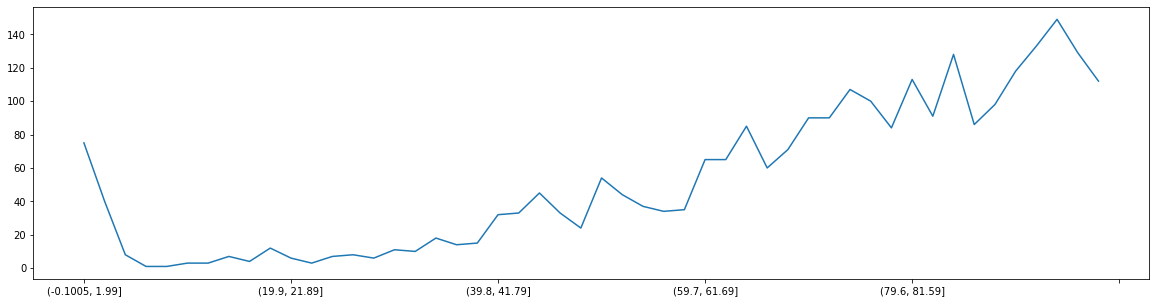

In [11]:
df[df['building_area']<100].building_area.value_counts(bins=50).sort_index().plot(figsize=(20,5))

#### A per above graph, lets ignore any values below 50 sq meters as these are potentially parking lots, and we only want to work with realistic residential values

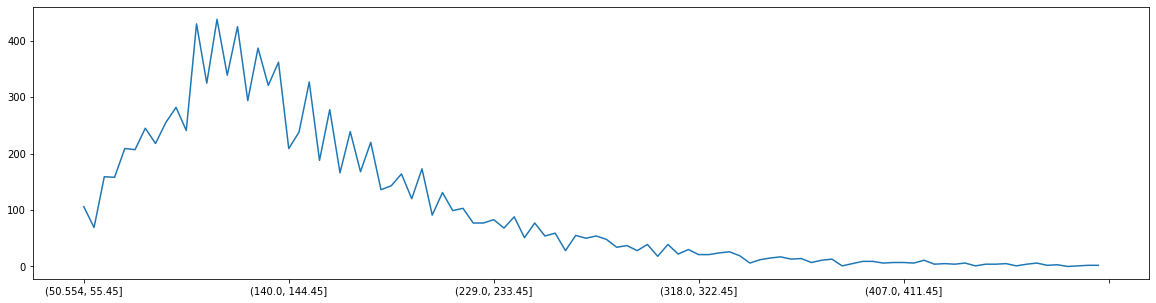

In [12]:
df[(df['building_area']>50) & (df['building_area']<500)] \
.building_area.value_counts(bins=100).sort_index().plot(figsize=(20,5))

#### Above graph shows our acceptable range of building_area, i.e  <font size="3">[50 to 500 sq meters]()</font>

In [13]:
df = df[(df['building_area']>50) & (df['building_area']<500)]
print("Records in the new cleaner dataset - ", df.shape[0])

Records in the new cleaner dataset -  10113


### 2.3 Convert the date column to the pandas datetime type    
   * Create a new column with the new date format

In [14]:
df['new_date'] = pd.to_datetime(df['date'], format='%d/%m/%Y').dt.date

## 3. Data Analysis
### 3.1 Was more money spent on houses or units overall? How many of each were sold?

#### property types :-
    h - house, cottage, villa, semi, terrace;
    u - unit, duplex;
    t - townhouse;

In [15]:
print('Records by property type:-\n', df['type'].value_counts())
print('\n\nTotal price grouped by property type (in Ks)\n', df.groupby(['type'])['price'].sum()/1000)
print('\n\nAvg. of price grouped by property type (in Ks)\n', df.groupby(['type'])['price'].mean()/1000)

Records by property type:-
 h    7710
u    1537
t     866
Name: type, dtype: int64


Total price grouped by property type (in Ks)
 type
h    9387569.559
t     786491.001
u     954393.487
Name: price, dtype: float64


Avg. of price grouped by property type (in Ks)
 type
h    1217.583600
t     908.188223
u     620.945665
Name: price, dtype: float64


#### Insights from above data: 
1. Total numbers of houses sold is much higher than the other 2 categories of townhouses / units
2. Overall, total money spent on houses is more than AUD 9 Million and much higher than the other 2 categories
3. Avg price/unit is lowest while avg price/house is highest, avg price/house is double compared to the units

### 3.2 Plot the relationship between building area and price

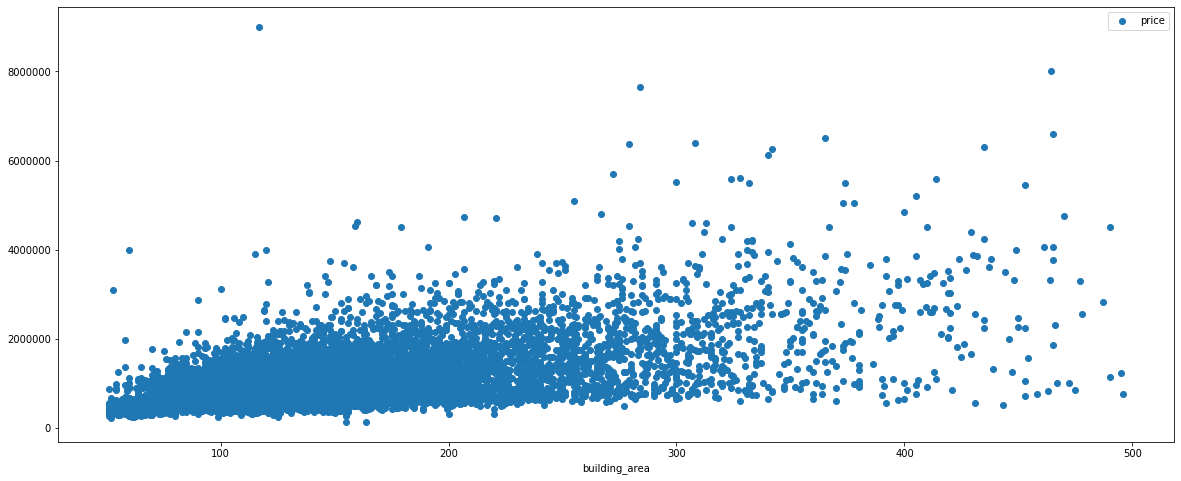

In [16]:
df.plot(x='building_area', y='price', style='o', figsize = (20,8))

#### Insights from above graph: the relationship between building_area and price is expected with few below exceptions:-
    1. The upper limit of price for a given building_area varies a lot compared to the lower limit of price
    2. The lower sq meters tend to have more stable and predictable prices compared to higher sq meters
    3. One of the obvious exceptions is the record with building_area of ~120 sq meter having the highest price

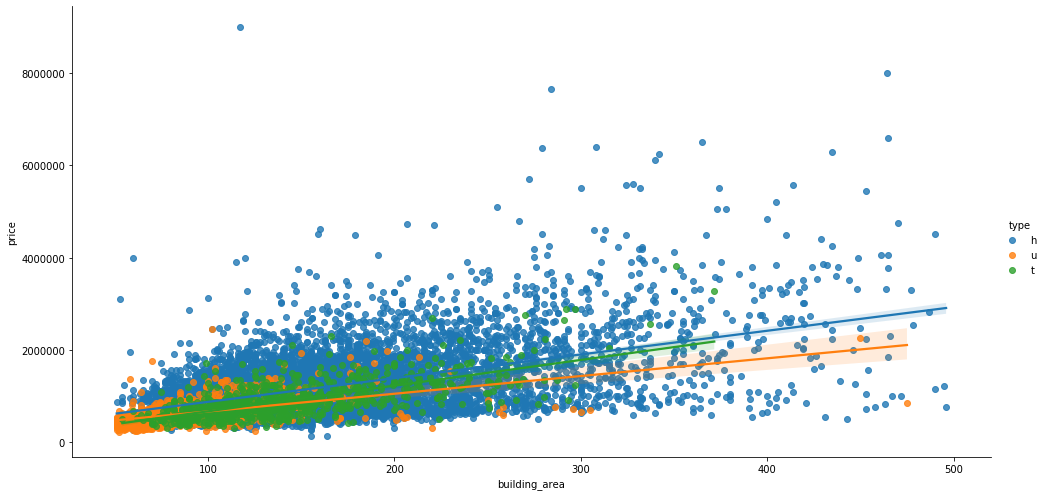

In [17]:
sns.lmplot('building_area', 'price', data=df, fit_reg=True, hue='type', height=7, aspect=2)

#### Insights from above graph: relationship of building_area vs price is similar for all 3 property types, except:-
    1. The variance of area vs price is much higher for houses compared to units and townhouses
    2. The prices of houses grow the highest with building_area compared to units or townhouses

### 3.3 If you limit your analysis to only 2 bedroom properties, are units or houses more expensive? Plot and interpret the distribution of prices for each.

In [18]:
df['bedrooms'].value_counts()

3     4474
4     2625
2     2195
5      575
1      172
6       57
7        9
8        4
12       1
10       1
Name: bedrooms, dtype: int64

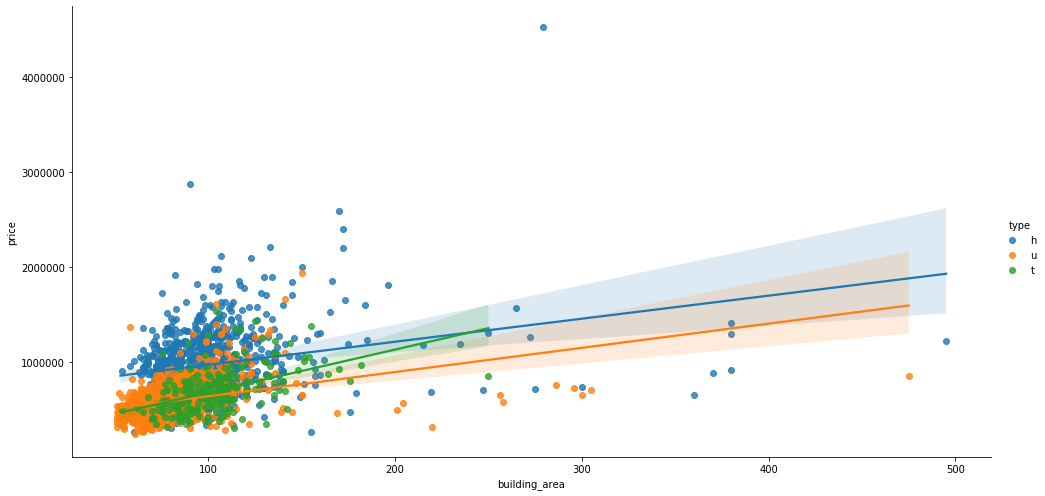

In [19]:
sns.lmplot('building_area', 'price', data=df[df['bedrooms']==2], fit_reg=True, hue='type', height=7, aspect=2)

#### Insights from above graph for properties with 2 bedrooms :-
    1. For houses and units, the growth of prices is having similar gradient 
    2. For townhouses the growth of prices by area is the highest compared to other property types

### 3.4 Split your data into separate dataframes for 2016, 2017 and 2018. Is the average price of a house going up or down in the period? Is the trend the same for units?

In [20]:
df['sale_yr'] = pd.DatetimeIndex(df['date']).year

In [21]:
df['sale_yr'].value_counts()

2017    5502
2016    3400
2018    1211
Name: sale_yr, dtype: int64

In [22]:
print('Records by sale year:-\n', df['sale_yr'].value_counts())
print('\n\nTotal price grouped by sale year (in Ks)\n', df.groupby(['sale_yr'])['price'].sum()/1000)
print('\n\nAvg. of price grouped by sale year (in Ks)\n', df.groupby(['sale_yr'])['price'].mean()/1000)
print('\n\nAvg. of price grouped by sale year and property type (in Ks)\n', df.groupby(['sale_yr', 'type'])['price'].mean()/1000)

Records by sale year:-
 2017    5502
2016    3400
2018    1211
Name: sale_yr, dtype: int64


Total price grouped by sale year (in Ks)
 sale_yr
2016    3817759.354
2017    5962448.305
2018    1348246.388
Name: price, dtype: float64


Avg. of price grouped by sale year (in Ks)
 sale_yr
2016    1122.870398
2017    1083.687442
2018    1113.333103
Name: price, dtype: float64


Avg. of price grouped by sale year and property type (in Ks)
 sale_yr  type
2016     h       1330.136590
         t        851.324051
         u        607.681905
2017     h       1179.441155
         t        947.329074
         u        635.075096
2018     h       1130.819884
         t        892.584615
         u        561.700000
Name: price, dtype: float64


#### Insights from above data for avg. property price by sale year and property type:-
    1. Avg. price for houses is going down year on year 
    2. There is no clear trend for avg. price for units for the 3 years given in dataset

## Challenge

Find the suburbs that have the highest and lowest proportion of sales were units. If you look them up on a map, are these suburbs where you expect them to be? Why?

### 4.1 Find highest and lowest selling suburb for units :-

In [23]:
print('Top 5 suburbs with highest units sold:-\n', df[df['type']=='u']['suburb'].value_counts().head(5))
print('\n\nBottom 5 suburbs with lowest units sold:-\n', df[df['type']=='u']['suburb'].value_counts().tail(5))

Top 5 suburbs with highest units sold:-
 St Kilda     57
Hawthorn     50
Reservoir    50
Elwood       49
Richmond     49
Name: suburb, dtype: int64


Bottom 5 suburbs with lowest units sold:-
 Blackburn South      1
Ivanhoe East         1
Lower Plenty         1
St Albans            1
Templestowe Lower    1
Name: suburb, dtype: int64


#### Above are the suburbs with highest and lowest proportion of units sold

### 4.2 Find highest and lowest selling suburb by avg. price for units :-

In [24]:
print('\n\nTop 5 suburbs with highest avg. unit price (in Ks)\n', df[df['type']=='u'].groupby(['suburb'])['price'].mean().nlargest(5)/1000)
print('\n\nBottom 5 suburbs with lowest avg. unit price \n', df[df['type']=='u'].groupby(['suburb'])['price'].mean().nsmallest(5)/1000)



Top 5 suburbs with highest avg. unit price (in Ks)
 suburb
Parkville         1511.00
East Melbourne    1207.50
Glen Waverley      970.20
Toorak             923.05
Albert Park        892.50
Name: price, dtype: float64


Bottom 5 suburbs with lowest avg. unit price 
 suburb
Dandenong North    318.333333
Frankston          335.250000
Travancore         338.833333
Werribee           359.500000
Heidelberg West    360.000000
Name: price, dtype: float64


#### Above are the suburbs with highest and lowest avg. units price

### 4.3 Use Folium lib to plot property locations for the highest selling suburb - St Kilda

In [25]:
import folium as fm

#### 4.3.1 Create list of all St Kilda locations

In [26]:
high_list = df[df['suburb']=='St Kilda'][['suburb', 'address', 'latitude', 'longtitude']].values.tolist()

#### 4.3.2 Plot locations on map by adding location in a folium feature group

In [27]:
high_map = fm.Map(location=[-37.8675, 144.9851]) # initialize a map object with andummy lat/long

fg = fm.FeatureGroup(name='high_map')

for i in high_list:
    fg.add_child(fm.Marker(location=[i[2], i[3]], popup=i[1], icon=fm.Icon(color='red')))

high_map.add_child(fg)

#### Insights from above map - St Kilda is top selling due to close proximity to CBD, MCG, Pupblic transport as well as "The MCG"

### 4.4 Use Folium lib to plot property locations for the highest selling suburb - Langwarrin

#### 4.4.1 Create list of all Langwarrin locations

In [28]:
low_list = df[df['suburb']=='Langwarrin'][['suburb', 'address', 'latitude', 'longtitude']].values.tolist()

#### 4.4.2 Plot locations on map by adding location in a folium feature group

In [29]:
low_map = fm.Map(location=[-37.8675, 144.9851]) # initialize a map object with andummy lat/long

fg = fm.FeatureGroup(name='low_map')

for i in low_list:
    fg.add_child(fm.Marker(location=[i[2], i[3]], popup=i[1], icon=fm.Icon(color='red')))

low_map.add_child(fg)

#### Insights from above map - Langwarrin is lowest selling due to its far away location from Melbourne CBD